In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
"""
    Perform gradient descent to optimize parameters w and b for linear regression.

    Parameters:
    x (numpy.ndarray): Input data points.
    y (numpy.ndarray): Target values.
    w (float): Current weight parameter.
    b (float): Current bias parameter.
    learning_rate (float): The learning rate for gradient descent.

    Returns:
    float: Updated weight parameter.
    float: Updated bias parameter.
"""
def gradient_descend(x, y, w, b, learning_rate): 
    dldw = 0.0   
    dldb = 0.0   
    N = x.shape[0]   # Number of datapoints in x
    # loss function = (y-(wx+b)))**2
    for xi, yi in zip(x,y): 
       # Partial derivative of loss function respect to w
       dldw += -2*xi*(yi-(w*xi+b))   
       # Partial derivative of loss function respect to b
       dldb += -2*(yi-(w*xi+b))      
    
    # Make an update to the w parameter 
    w = w - learning_rate*(1/N)*dldw
    b = b - learning_rate*(1/N)*dldb
    return w, b 

In [39]:
"""
    Predicts the output values for new input data points using trained parameters.

    Parameters:
    trained_w (float): Trained weight parameter.
    trained_b (float): Trained bias parameter.
"""
def predict(trained_w, trained_b):
    # Ask the user for new input data points
    num_points = int(input("Enter the number of new data points: "))
    new_x = []
    for i in range(num_points):
        data_point = float(input(f"Enter value for data point {i + 1}: "))
        new_x.append([data_point])
    new_x = np.array(new_x)

    # Make predictions for new input data
    predictions = trained_w * new_x + trained_b
    print("Predictions:", predictions)

In [60]:
#===================================================================================#
columns = ["class","Alcohol","Malic Acid", "Ash", "Alcalinity of Ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid Phenols","Proanthocyanins","Color Intensity","Hue","OD280/OD315 of diluted wines","Proline"]
data = pd.read_csv('DataSets/wine.data',names = columns)
# Extract features and target
x = data['Color Intensity'].values
y = data['Alcohol'].values

#x1 = np.random.randn(20,1)
#y1 = 5*x + np.random.rand()

# Parameters
w = 0.0 
b = 0.0 
learning_rate = 0.01
losses = []
data

,class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


0 loss is 0.459725784890132, paramters w:0.19132798003254736, b:12.032863857573862
1 loss is 0.45972578489013194, paramters w:0.19132798003253484, b:12.032863857573938
2 loss is 0.45972578489013194, paramters w:0.19132798003252235, b:12.032863857574014
3 loss is 0.45972578489013194, paramters w:0.1913279800325099, b:12.03286385757409
4 loss is 0.459725784890132, paramters w:0.1913279800324974, b:12.032863857574165
5 loss is 0.45972578489013194, paramters w:0.19132798003248508, b:12.03286385757424
6 loss is 0.459725784890132, paramters w:0.19132798003247284, b:12.032863857574315
7 loss is 0.459725784890132, paramters w:0.19132798003246063, b:12.03286385757439
8 loss is 0.45972578489013194, paramters w:0.1913279800324484, b:12.032863857574464
9 loss is 0.45972578489013194, paramters w:0.19132798003243623, b:12.032863857574538
10 loss is 0.45972578489013194, paramters w:0.19132798003242402, b:12.032863857574613
11 loss is 0.45972578489013194, paramters w:0.1913279800324118, b:12.032863857

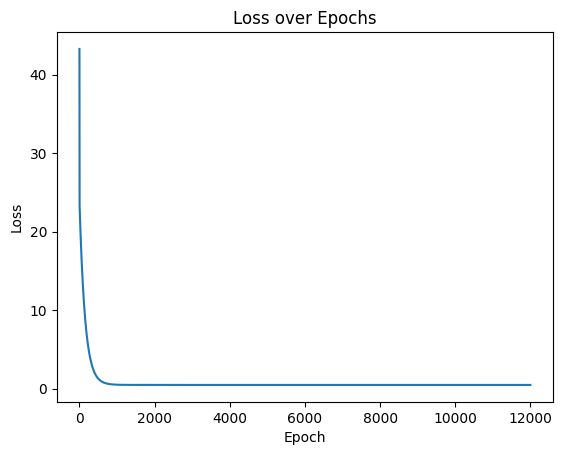

In [63]:
# Iteratively make updates
for epoch in range(4000): 
    w,b = gradient_descend(x,y,w,b,learning_rate)
    yhat = w*x + b
    loss = np.divide(np.sum((y-yhat)**2, axis=0), x.shape[0]) 
    losses.append(loss)  # Store the loss for this epoch    
    print(f'{epoch} loss is {loss}, paramters w:{w}, b:{b}')

print("Final Parameters: w:", w, "b: ", b)
# Plot the loss values
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()

In [62]:
# Trained parameters
trained_w = w  # Insert the value of 'w' after training
trained_b = b  # Insert the value of 'b' after training

while True:
    # Ask the user if he wants to predict
    user_choice = input("Do you want to make a prediction? (yes/no): ").lower()
    if user_choice == "no":
        print("Exiting the program.")
        break

    elif user_choice == "yes":
        predict(trained_w, trained_b)


Predictions: [[13.11195366]]
Exiting the program.
